In [1]:
import serial
from scipy.io.wavfile import read, write
import io
import numpy

# Open serial connection, resetting Arduino
SerialData = serial.Serial('com3', 115200)

# Collecting data from serial port and convert to list of decimal integers
count = 0
ListData = []

while True: # Wait for 0 byte from Arduino - indicating start of recording
    if (SerialData.read() == b'\x00'):
        break

while True: # Add recorded bytes to array until 0 byte received - indicating end of recording
    Data = SerialData.read()
    if (Data != b'\x00'):
        ListData.append(Data)
    else:
        break

# Convert recorded bytes into int values
CleanData = []
for i in range(len(ListData)):
    CleanData.append(int.from_bytes(ListData[i], "big"))

# Convert int values into .wav file to be used by Chat GPT API
BytesData = numpy.array(CleanData, 'uint8')
write('output.wav', 8000, BytesData)

# Receive story text from Chat GPT API
Text = "Once there was a man, his name was Jim. Jim had no friends until he went to the gym and met another man called Tim."

# Send text word by word to arduino
TextList = Text.split()
j = 0
while (j < 20000000): # Initial delay to ensure Arduino is ready to receive text
    j += 1
for i in range(len(TextList)):
    SerialData.write(bytes(str(len(TextList[i])) + TextList[i], 'utf-8')) # Length of each word sent before word
    j = 0
    while (j < 5000000): # Further delay controls text rate, min = 1E6, max = 1E8?
        j += 1
SerialData.write(bytes("0", 'utf-8')) # Send 0 byte to indicate end of text

#Close serial port resetting system
SerialData.close()


In [25]:
from scipy.io.wavfile import read, write
import io
import numpy
import serial

# Retrieve int values from .wav file
with open("output.wav", "rb") as wavfile:
    input_wav = wavfile.read()
rate, data = read(io.BytesIO(input_wav))

#Convert int values into bytes to be sent via serial
newListData = []
for i in range(len(data)):
    newListData.append(int.to_bytes(int(data[i]), 1, "big"))

#Open serial connection and send bytes
SerialData = serial.Serial('com3', 80000)
for i in range(len(newListData)):
    output = SerialData.write(newListData[i])
SerialData.close()


8000
[b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x7f', b'\x80', b'\x80', b'\x80', b'\x80', b'\x81', b'\x81', b'\x82', b'\x83', b'\x85', b'\x88', b'\x8d', b'\x93', b'\x90', b'z', b'y', b'x', b'\x81', b'r', b'w', b'z', b'\x82', b'\x83', b'\x7f', b't', b'z', b'{', b'~', b'z', b'y', b'\x7f', b'x', b'}', b'{', b'~', b'~', b'}', b'{', b'{', b'{', b'\x82', b'\x81', b'\x84', b'\x82', b'\x81', b'\x7f', b'~', b'~', b'~', b'\x81', b'\x83', b'\x86', b'\x84', b'\x80', b'\x80', b'\x81', b'\x80', b'\x82', b'\x83', b'\x86', b'\x86', b'\x84', b'\x82', b'\x80', b'\x82', b'\x82', b'\x82', b'\x82', b'\x84', b'\x86', b'\x86', b'\x83', b'\x82', b'\x82', b'\x82', b'\x82', b'\x82', b'\x83', b'\x85', b'\x85', b'\x83', b'\x82', b'\x82', b'\x81', b'\x81', b'\x81', b'\x82', b'\x84', b'\x84', b'\x83', b'\x81', b'\x81', b'\x80', b'\x80', b'\x81', b'\x82', b'\x84', b'\x83', b'\x82', b'\x82', b'\x80', b'\x80', b'\x80', b'\x80', b'\x81', b'\x82', b'\x83', b'\x82', b'\x80', b'\x80', b'\x80', b'\x

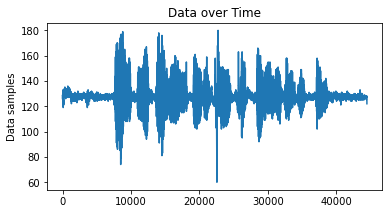

In [9]:
import matplotlib.pyplot as plt

#Create plot from recorded data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.clear()
ax.plot(range(len(CleanData)), CleanData)
plt.subplots_adjust(bottom=0.30)
plt.title('Data over Time')
plt.ylabel('Data samples')
plt.show()
